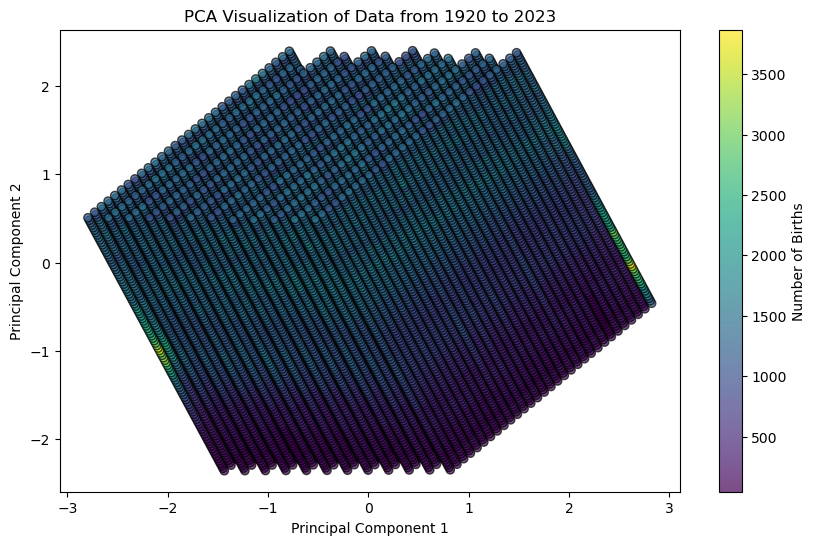

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def load_dataset(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    return df

def convert_to_numerical(df):
    # Convert categorical data to numerical using one-hot encoding
    df_numerical = pd.get_dummies(df, columns=['state'])

    # Convert 'date' to datetime and extract year, month, and day
    df_numerical['date'] = pd.to_datetime(df_numerical['date'])
    df_numerical['year'] = df_numerical['date'].dt.year
    df_numerical['month'] = df_numerical['date'].dt.month
    df_numerical['day'] = df_numerical['date'].dt.day

    # Drop the original 'date' column
    df_numerical = df_numerical.drop('date', axis=1)

    return df_numerical

def preprocess_and_visualize(df):
    # Separate features (X) and target variable (y)
    X = df.drop('births', axis=1)
    y = df['births']

    # Standardize the feature values
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_standardized)

    # Visualize in 2D using the first two principal components
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.title('PCA Visualization of Data from 1920 to 2023')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Number of Births')
    plt.show()
    

# Example usage:
file_path = 'births.csv'
df = load_dataset(file_path)
df_numerical = convert_to_numerical(df)
preprocess_and_visualize(df_numerical)


# Linear regression by using pca in 2012 to 2023

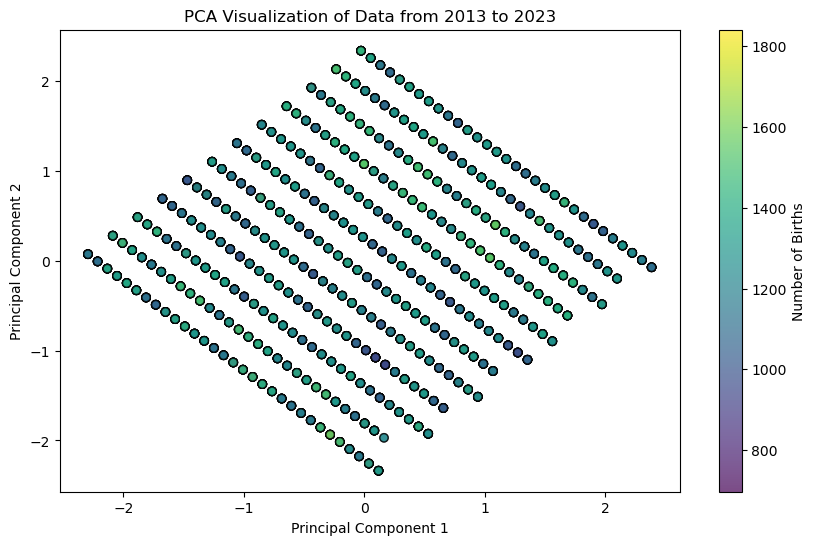

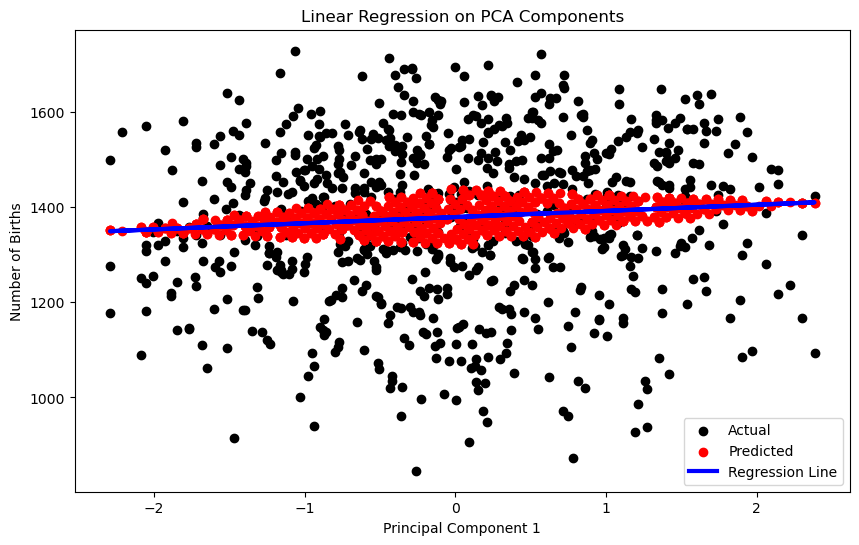

Mean Squared Error: 28415.83950255241
Coefficients: [12.96736149 25.23884481  0.        ]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def load_and_filter_dataset(file_path, start_year, end_year):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Convert 'date' to datetime and extract year
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year

    # Filter data for the specified years
    df_filtered = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

    return df_filtered

def convert_to_numerical(df):
    # Convert categorical data to numerical using one-hot encoding
    df_numerical = pd.get_dummies(df, columns=['state'])

    # Extract year, month, and day
    df_numerical['year'] = df_numerical['date'].dt.year
    df_numerical['month'] = df_numerical['date'].dt.month
    df_numerical['day'] = df_numerical['date'].dt.day

    # Drop the original 'date' column
    df_numerical = df_numerical.drop(['date', 'year'], axis=1)

    return df_numerical

def preprocess_and_visualize(df):
    # Separate features (X) and target variable (y)
    X = df.drop('births', axis=1)
    y = df['births']

    # Standardize the feature values
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_standardized)

    # Visualize in 2D using the first two principal components
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.title('PCA Visualization of Data from 2013 to 2023')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Number of Births')
    plt.show()

    return X_pca, y

def compute_coefficients(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Display coefficients and intercept
    print("Coefficients:", model.coef_)

def perform_linear_regression(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Visualize the linear regression results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], y_test, color='black', label='Actual')
    plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')

    # Plot the regression line
    plt.plot(X_test[:, 0], model.coef_[0] * X_test[:, 0] + model.intercept_, color='blue', linewidth=3, label='Regression Line')

    plt.title('Linear Regression on PCA Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Number of Births')
    plt.legend()
    plt.show()

    # Evaluate the model performance
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

# Main code
file_path = 'births.csv'
start_year = 2013
end_year = 2023

df_filtered = load_and_filter_dataset(file_path, start_year, end_year)
df_numerical = convert_to_numerical(df_filtered)
X_pca, y = preprocess_and_visualize(df_numerical)
perform_linear_regression(X_pca, y)
compute_coefficients(X_pca, y)
